# Imports

In [44]:
# Cargar OpenCV
import cv2
import argparse
import imutils
# Sirve para operar con cualquier dato numérico
import numpy as np
import matplotlib.pyplot as plt
import matplotlib._color_data as mcd
import matplotlib.patches as mpatch

In [33]:
colors = [name for name in mcd.CSS4_COLORS]

In [22]:
# Leer las imágenes que vamos a comparar
# Imagen sobre la que vamos a detectar si existe otra imagen
img_rgb = cv2.imread('casas3.png')

# Imagen que comprobamos si existe en la imagen Todo
images_name = ['detm.png','det.png','det2.png','detm2.png','detm3.png']
imageList = []
for image in image_names:
    template = cv2.imread(image)
    imageList.append(template)
    
    
height, width, channels = template.shape
rotated = img_rgb

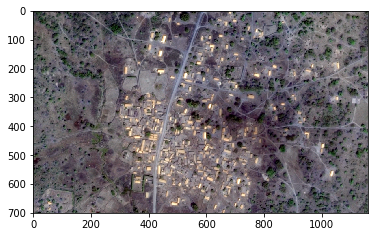

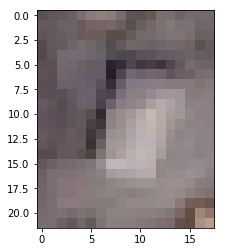

In [23]:
plt.imshow(img_rgb)
plt.show()

plt.imshow(template)
plt.show()

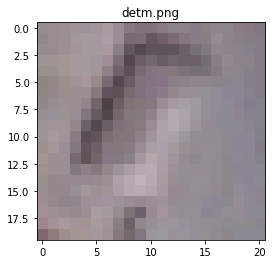

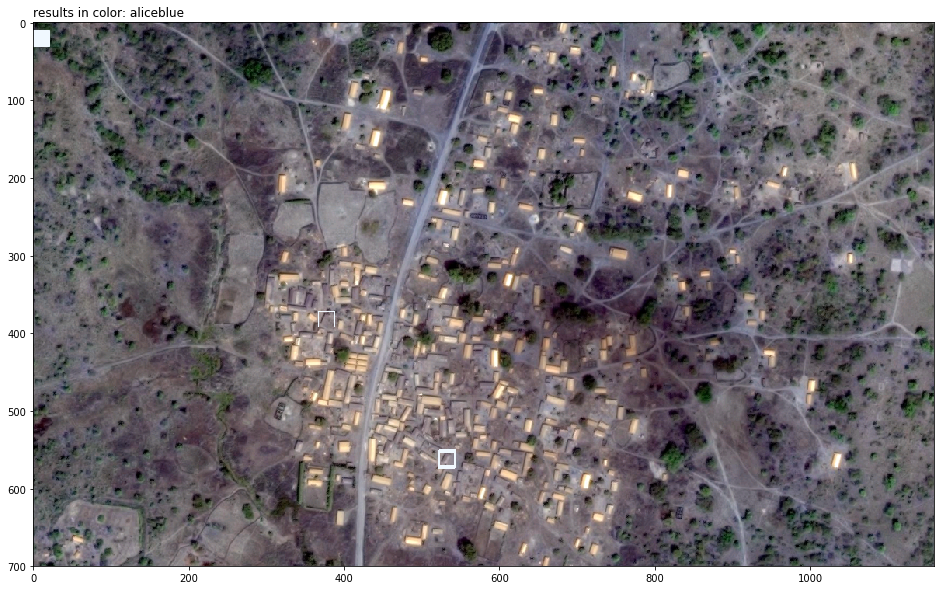

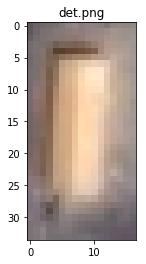

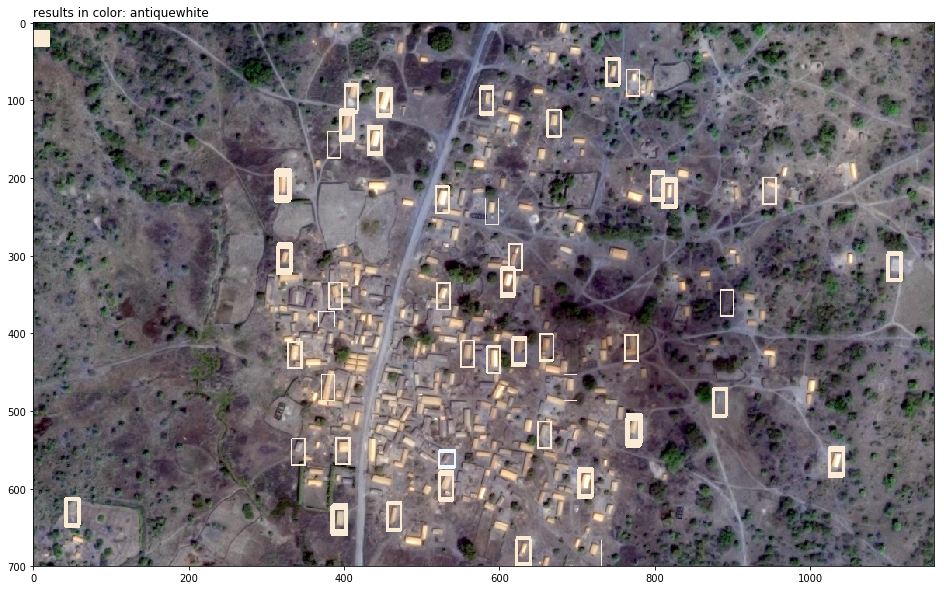

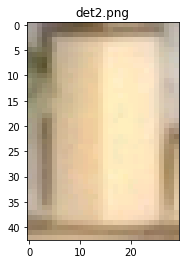

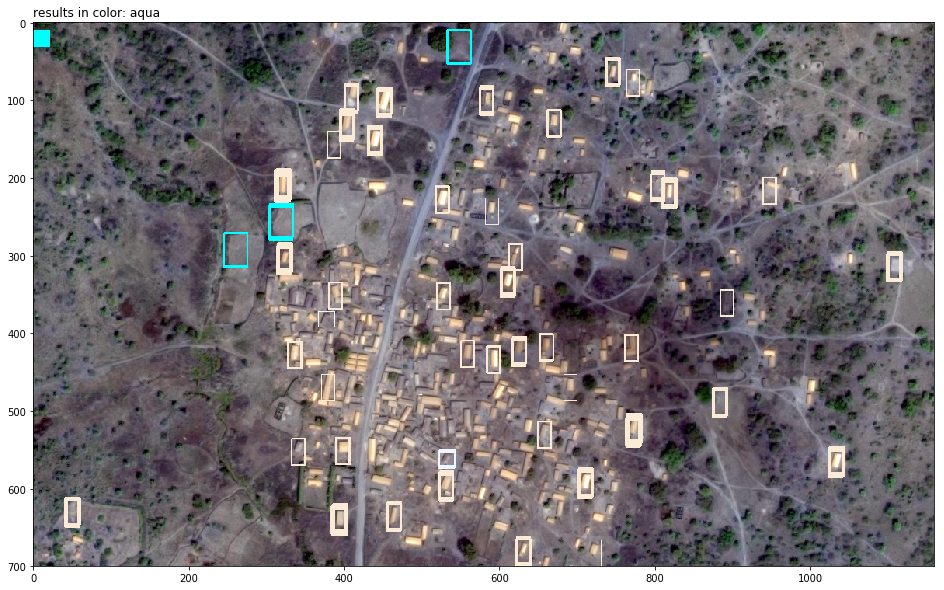

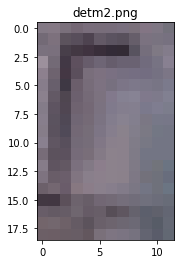

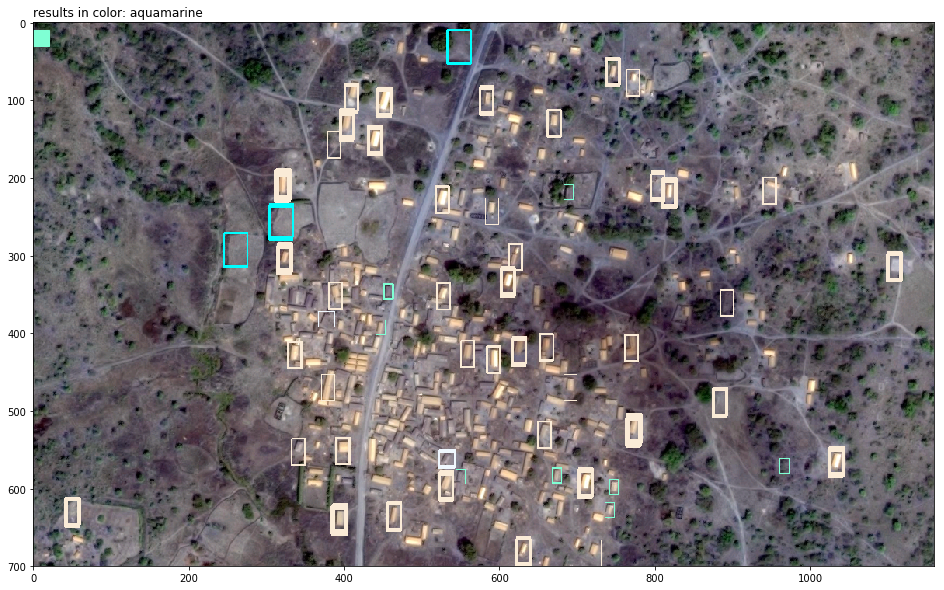

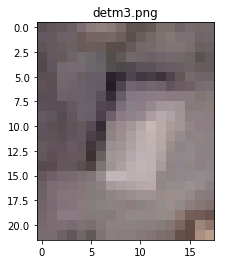

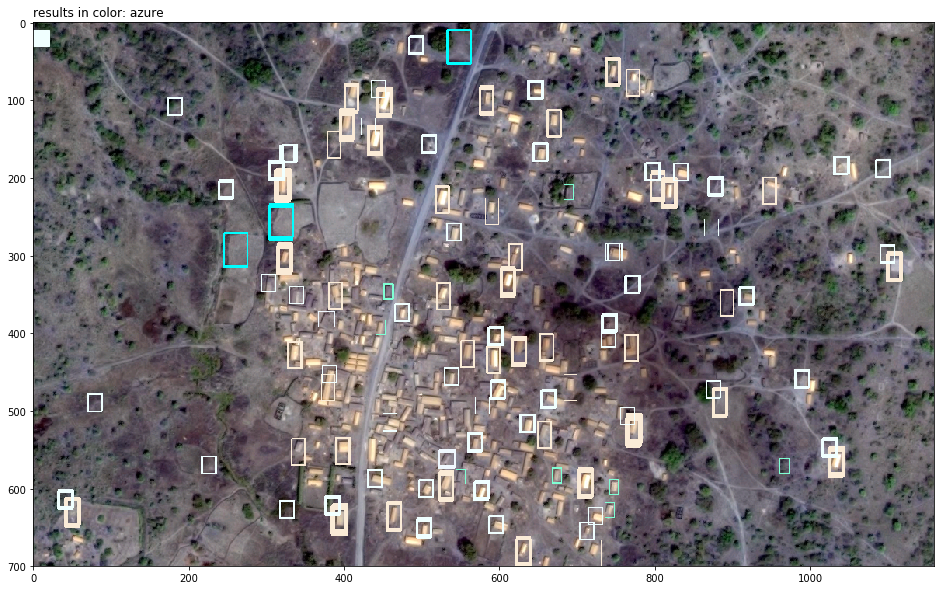

In [52]:

#select method
girarImagen = False

#copy_image
img_results = img_rgb.copy()

if(girarImagen == True):
    for angle in np.arange(0,360,15):
        rotated = imutils.rotate(img_results, angle)
        height, width, channels = rotated.shape
    
    

        # Tamaño de la imagen 1.jpg
        w, h = template.shape[:-1]
 
       # Función que sirve para detectar si una imagen está contenida en otra
        res = cv2.matchTemplate(rotated, template, cv2.TM_CCOEFF_NORMED)
 
     # Umbral admitido
        threshold = .7
 
        # Si está dentro del umbral, crear un cuadrado sobre la imagen contenida en la imagen Todo
        loc = np.where(res >= threshold)
        for pt in zip(*loc[::-1]):  #  Cambiar columnas y filas
            cv2.rectangle(rotated, pt, (pt[0] + w, pt[1] + h), (0, 0, 0), 1)
    
        
        plt.imshow(rotated)
        plt.show()
    

if(girarImagen == False):
    for template,name,col in zip(imageList,images_name,colors):
        h, w = template.shape[:-1]
 
        # Función que sirve para detectar si una imagen está contenida en otra
        res = cv2.matchTemplate(img_results, template, cv2.TM_CCOEFF_NORMED)
 
        # Umbral admitido
        threshold = .65
 
        # Si está dentro del umbral, crear un cuadrado sobre la imagen contenida en la imagen Todo
        loc = np.where(res >= threshold)
        color=mcd.CSS4_COLORS[col]
        R = int(color[1:3],16) 
        G = int(color[3:5],16) 
        B = int(color[5:7],16)
        
        for pt in zip(*loc[::-1]):  #  Cambiar columnas y filas
            cv2.rectangle(img_results, pt, (pt[0] + w, pt[1] + h), (R, G, B), 1)

        plt.title(name)
        plt.imshow(template)
        plt.show()
        
        f, ax = plt.subplots(figsize=(20,10))
        ax.set_title('results in color: '+col,loc='left')
        r1 = mpatch.Rectangle((0, 10), 20, 20, color=color)
        ax.add_patch(r1)
        
        ax.imshow(img_results)
        
        plt.show()


In [ ]:
# Guardar el resultado
#cv2.imwrite('result.png', img_rgb)